# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# we ended up using a different name for our file below
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

if weather_api_key == 'YOUR KEY HERE!':
    print('\033[1;31m-------------')
    print('-------------')
    print('')
    print('NOTE: You need to enter your API keys into the api_keys.py file')
    print('for this script to execute')
    print('')
    print('-------------')    
    print('-------------')


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print('---')
print('here is the number of cities: ' + str(len(cities)))



---
here is the number of cities: 590


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# let's play with the API and JSON:
# set our test api endpoint:
url = 'http://api.openweathermap.org/data/2.5/weather?'
# units = 'metric' # instructions say F degrees (and not F Troop)
units = 'imperial' # set this to get temps in F and wind speed in MPH
# build a partial query URL:
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create list for our current temp of each city
temp = []
humid = [] # returns in % no conversion needed
cloud = [] # returns in % no conversion needed
wind = [] # returns in meters/sec
city_name = []
city_id = []
city_lat = []
city_lng = []
city_date = []
country = []

os.system('say "Starting API calls.  I will let you know when I am done."')

# Loop through each city and get temp
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        #print(response['main'])
        temp_now = response['main']['temp']
        humid_now = response['main']['humidity']
        cloud_now = response['clouds']['all']
        wind_now = response['wind']['speed']
        city_now = response['id']
        
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_id.append(response['id'])
        city_lat.append(float(response['coord']['lat']))
        city_lng.append(float(response['coord']['lon']))
        city_date.append(response['dt'])
        country.append(response['sys']['country'])
        city_name.append(city)
        print(f"processing city: {city} ID: {city_now}")
    except:
        print('----> Something not found, skipping <----')
        pass

print('------------')
print('--> DONE! <---')
print('------------')
# audio report of API work complete
os.system('say "All API calls complete."')
    
    

processing city: barrow ID: 5880054
processing city: dikson ID: 1507390
processing city: rikitea ID: 4030556
processing city: punta arenas ID: 3874787
processing city: saldanha ID: 3361934
processing city: marshall ID: 4074736
processing city: xinzhi ID: 1788462
processing city: bandarbeyla ID: 64814
processing city: butaritari ID: 2110227
processing city: caravelas ID: 3466980
processing city: mataura ID: 6201424
processing city: margate ID: 2643044
processing city: kaitangata ID: 2208248
processing city: dalby ID: 2169535
processing city: longyearbyen ID: 2729907
processing city: gasa ID: 281133
processing city: chokurdakh ID: 2126123
processing city: sorland ID: 3137469
processing city: kandrian ID: 2094746
processing city: east london ID: 1006984
processing city: maningrida ID: 2067089
processing city: kavieng ID: 2094342
processing city: victor harbor ID: 2059470
processing city: hun ID: 2216645
----> Something not found, skipping <----
processing city: ostrovnoy ID: 556268
proces

processing city: eldorado ID: 3464343
processing city: okha ID: 2122614
processing city: pangnirtung ID: 6096551
processing city: champerico ID: 3598787
processing city: lagoa ID: 3372964
processing city: jacareacanga ID: 3397763
processing city: tacoronte ID: 2510725
processing city: kachiry ID: 1523662
processing city: grand gaube ID: 934479
processing city: benguela ID: 3351663
processing city: mongu ID: 906054
processing city: katherine ID: 2068655
processing city: omboue ID: 2396853
processing city: dalnegorsk ID: 2051471
processing city: mandera ID: 187896
processing city: rocha ID: 3440777
processing city: lavrentiya ID: 4031637
processing city: tamiahua ID: 3516376
processing city: kaduna ID: 2335727
processing city: manono ID: 209598
processing city: najran ID: 103630
processing city: bengkulu ID: 1649150
processing city: tupelo ID: 4448903
processing city: hilo ID: 5855927
processing city: nizhniy tsasuchey ID: 2019118
processing city: linxia ID: 1803331
processing city: camp

processing city: navahrudak ID: 624785
processing city: meulaboh ID: 1214488
processing city: namibe ID: 3347019
processing city: karabulak ID: 552951
processing city: aja ID: 361702
processing city: homer ID: 5864145
processing city: kosino ID: 544119
processing city: imbituba ID: 3461370
processing city: dasol ID: 1715427
processing city: kaiu ID: 589115
processing city: olafsvik ID: 3414079
processing city: rypin ID: 3086511
processing city: shubarkuduk ID: 608271
processing city: labuhan ID: 8079926
processing city: shirvan ID: 409417
----> Something not found, skipping <----
processing city: upernavik ID: 3418910
processing city: oppdal ID: 3143513
processing city: clyde river ID: 5924351
processing city: fort saint james ID: 5881688
processing city: humberto de campos ID: 3398428
processing city: opuwo ID: 3354077
processing city: ilan ID: 1674199
processing city: toora-khem ID: 1489401
----> Something not found, skipping <----
----> Something not found, skipping <----
processing

0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = {'City Name': city_name, 'City ID': city_id, 
               'country': country, 'Temperature': temp,
               'Humidity': humid, 'Cloudiness': cloud, 'Wind Speed': wind,
               'Lat': city_lat, 'Lng': city_lng, 'Date': city_date}
weather_data_now_df = pd.DataFrame(weather_data)
#print(weather_data_df)
# if we want to drop rows where humidity > 100, uncomment the line below
# turns out later, we want this data according to the instructions

weather_data_no_humid_df = weather_data_now_df[weather_data_now_df.Humidity < 101]
#weather_data_no_humid_df.head()
# ok, we want to work without crazy humidity, so let's drop it in our main dataframe

weather_data_df = weather_data_no_humid_df

# here we are also going to save our output CSV
print('---> saving our dataframe as a csv')
print(' look for our file in: output_data/cities_weather.csv')

weather_data_df.to_csv('output_data/cities_weather.csv', index = False)
print(f" number of cities in our data = {weather_data_df['country'].count()}")

---> saving our dataframe as a csv
 look for our file in: output_data/cities_weather.csv
 number of cities in our data = 537


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# this step done above, though right below the instructions want this again
# so why remove it he, he wonders...

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data_big_humid_df = weather_data_df[weather_data_df.Humidity > 100]
print('')
print('\033[1;31m  ---> This should return nothing as we\'ve removed those cities <---')
weather_data_big_humid_df

  ---> This should return nothing as we've removed those cities <---


,City Name,City ID,country,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print('---> I\'ve already done this.  It\'s called weather_data_df')
weather_data_df.head()

---> I've already done this.  It's called weather_data_df


,City Name,City ID,country,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng,Date
0,barrow,5880054,US,15.80,79,90,5.75,71.2906,-156.7887,1620274503
1,dikson,1507390,RU,23.54,87,87,7.47,73.5069,80.5464,1620274787
2,rikitea,4030556,PF,77.58,81,100,11.07,-23.1203,-134.9692,1620274788
3,punta arenas,3874787,CL,44.29,81,0,12.66,-53.1500,-70.9167,1620274788
4,saldanha,3361934,ZA,55.40,88,86,2.30,-33.0117,17.9442,1620274788


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

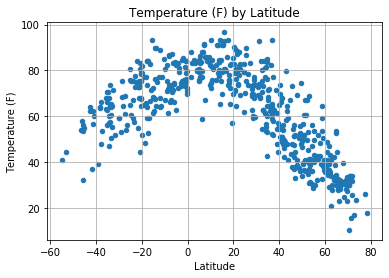

---
In this plot we can see temperature rise as we get closer to the equator
...and drop as we approach the poles.



<Figure size 432x288 with 0 Axes>

In [26]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Temperature", grid=True,
              title="Temperature (F) by Latitude")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.show()
plt.savefig('output_data/temp-by-lat.png')
print('\033[1;31m---')
print('In this plot we can see temperature rise as we get closer to the equator')
print('...and drop as we approach the poles.')
print('')

## Latitude vs. Humidity Plot

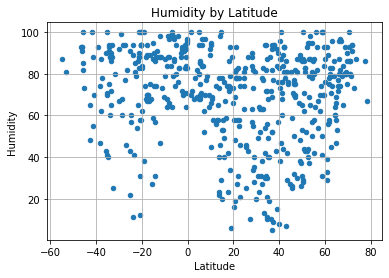

---
In this plot we see humidity on the whole pretty evenly spread by latitude.
What it doesn't tell us is available land-mass at any latitude.
An interesting follow-up analysis might control for that.


<Figure size 432x288 with 0 Axes>

In [27]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
              title="Humidity by Latitude")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
plt.savefig('output_data/humidity-by-lat.png')
print('\033[1;31m---')
print('In this plot we see humidity on the whole pretty evenly spread by latitude.')
print('What it doesn\'t tell us is available land-mass at any latitude.')
print('An interesting follow-up analysis might control for that.')

## Latitude vs. Cloudiness Plot

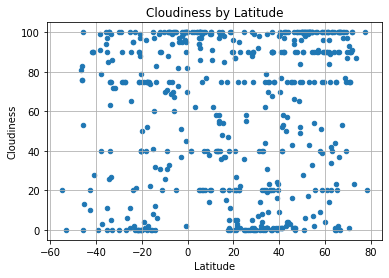

---
In this plot we see clouds on the whole fairly evenly spread by latitude,
with perhaps more clouds at the poles.
It might be interesting to also plot cloudiness by temparature.


<Figure size 432x288 with 0 Axes>

In [28]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
              title="Cloudiness by Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('output_data/clouds-by-lat.png')
print('\033[1;31m---')
print('In this plot we see clouds on the whole fairly evenly spread by latitude,')
print('with perhaps more clouds at the poles.')
print('It might be interesting to also plot cloudiness by temparature.')

## Latitude vs. Wind Speed Plot

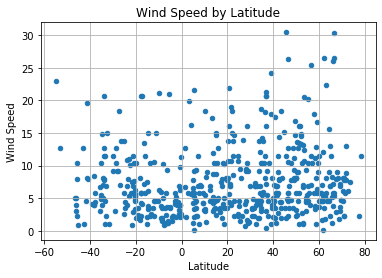

---
In this plot we see wind speeds are generally below 10mph.
Our data points also simply show more cities in the Northern hemisphere.
For a more accurate depiction of global wind speeds, we might want
to look for datapoints beyond cities.


<Figure size 432x288 with 0 Axes>

In [29]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
              title="Wind Speed by Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('output_data/wind-by-lat.png')
print('\033[1;31m---')
print('In this plot we see wind speeds are generally below 10mph.')
print('Our data points also simply show more cities in the Northern hemisphere.')
print('For a more accurate depiction of global wind speeds, we might want')
print('to look for datapoints beyond cities.')

## Linear Regression

In [15]:
# separate the data into north and south
data_north_df = weather_data_df[weather_data_df.Lat > 0 ]
data_south_df = weather_data_df[weather_data_df.Lat < 0 ]

print('--- Done! ---')


--- Done! ---


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

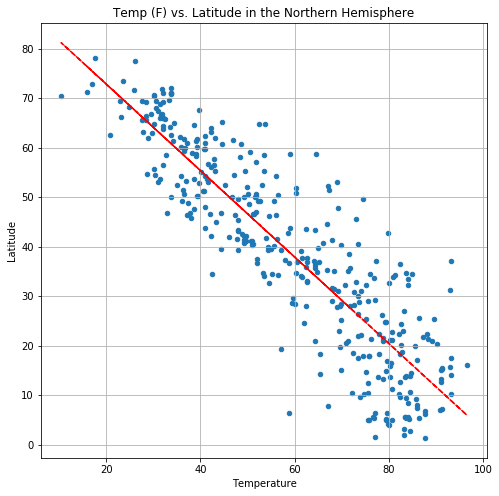

In [16]:
# Let's do our linear regression on temp vs. latitude in the North
x_data = data_north_df['Temperature']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Temperature", y="Lat", grid=True, figsize=(8,8),
              title="Temp (F) vs. Latitude in the Northern Hemisphere")
plt.ylabel('Latitude')
plt.plot(x_data, data_fit, '--', color='red')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

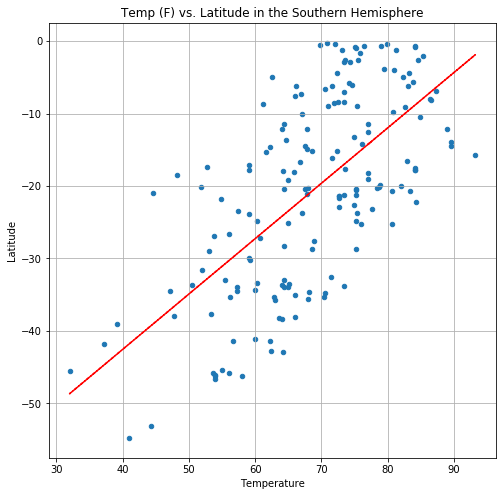

---
In our two plots we see a strong predictive relationship latitude and temperature.
It clearly gets warmer near the equator and cooler near the poles.


In [30]:
# Let's do our linear regression on temp vs. latitude in the South
x_data = data_south_df['Temperature']
y_data = data_south_df['Lat']
# try converting our lat to positive numbers, doesn't fix the problem
#y_data = abs(data_south_df['Lat'])
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_south_df.plot(kind="scatter", x="Temperature", y="Lat", grid=True, figsize=(8,8),
              title="Temp (F) vs. Latitude in the Southern Hemisphere")
plt.ylabel('Latitude')
plt.plot(x_data, data_fit, '--', color='red')
plt.show()
print('\033[1;31m---')
print('In our two plots we see a strong predictive relationship latitude and temperature.')
print('It clearly gets warmer near the equator and cooler near the poles.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

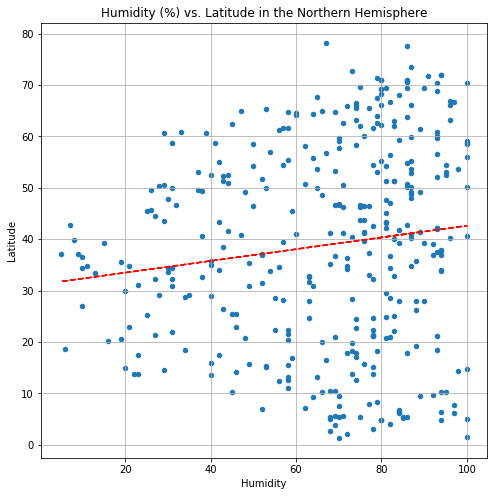

In [18]:
# Let's do our linear regression on humidity vs. latitude in the North
x_data = data_north_df['Humidity']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(8,8),
              title="Humidity (%) vs. Latitude in the Northern Hemisphere")
plt.ylabel('Latitude')
plt.plot(x_data, data_fit, '--', color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

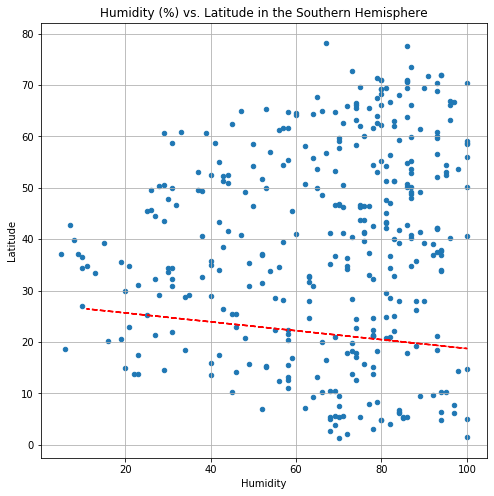

---
The first thing these two plots show is far more city datapoints in the north.
I'm not seeing much of a relationship between latitude and humidity based
on this data.


In [31]:
# Let's do our linear regression on temp vs. latitude in the South
x_data = data_south_df['Humidity']
y_data = abs(data_south_df['Lat'])
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(8,8),
              title="Humidity (%) vs. Latitude in the Southern Hemisphere")

plt.plot(x_data, data_fit, '--', color='red')
plt.ylabel('Latitude')
plt.show()
print('\033[1;31m---')
print('I\'m not seeing much of a relationship between latitude and humidity based')
print('on this data.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

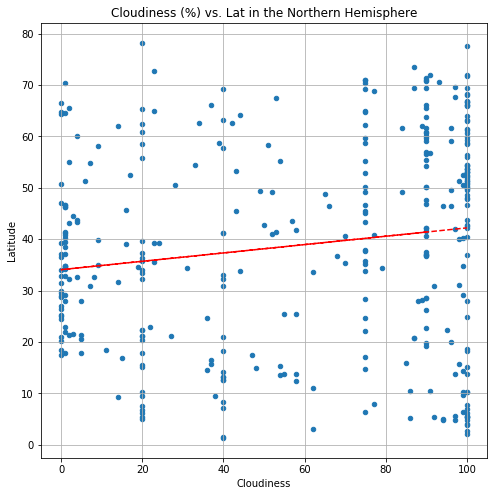

In [20]:
# Let's do our linear regression on Cloudiness vs. latitude in the North
x_data = data_north_df['Cloudiness']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Cloudiness", y="Lat", grid=True, figsize=(8,8),
              title="Cloudiness (%) vs. Lat in the Northern Hemisphere")
#plt.ylabel('A label here')
plt.plot(x_data, data_fit, '--', color='red')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

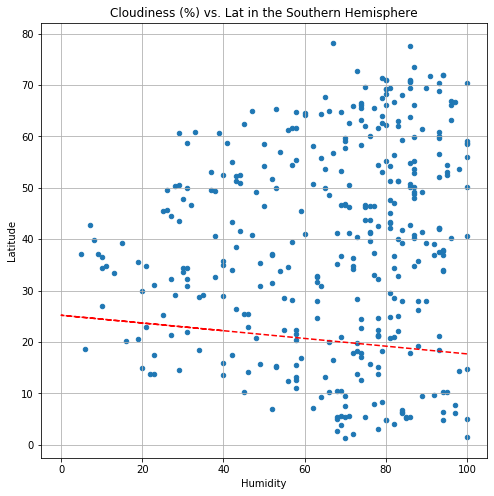

---
What we see here is cloudiness pretty even across the latitudes.
The data from the North looks a little odd, in that it's stacked 
vertically in a manner we wouldn't expect.


In [32]:
# Let's do our linear regression on cloudiness vs. latitude in the South
x_data = data_south_df['Cloudiness']
y_data = abs(data_south_df['Lat'])
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(8,8),
              title="Cloudiness (%) vs. Lat in the Southern Hemisphere")
plt.ylabel('Latitude')
plt.plot(x_data, data_fit, '--', color='red')

plt.show()
print('\033[1;31m---')
print('What we see here is cloudiness pretty even across the latitudes.')
print('The data from the North looks a little odd, in that it\'s stacked ')
print('vertically in a manner we wouldn\'t expect.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

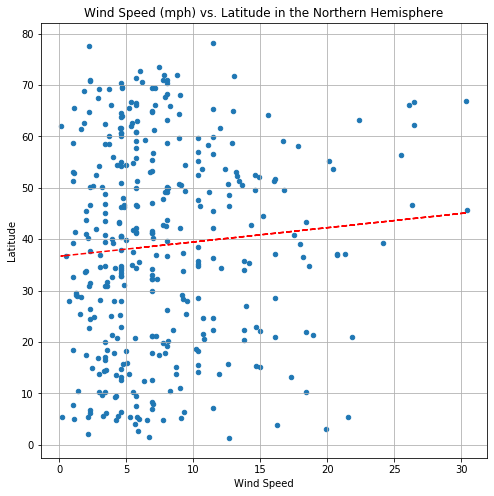

In [22]:
# Let's do our linear regression on wind speed vs. latitude in the North
x_data = data_north_df['Wind Speed']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Wind Speed", y="Lat", grid=True, figsize=(8,8),
              title="Wind Speed (mph) vs. Latitude in the Northern Hemisphere")
plt.ylabel('Latitude')
plt.plot(x_data, data_fit, '--', color='red')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

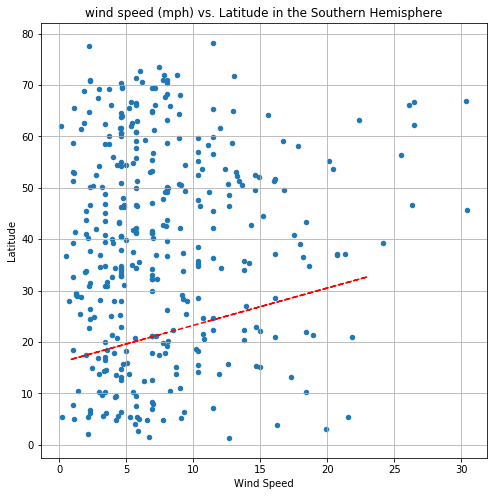

---
Our regression line is showing a trend of higher wind speed as we move closer to the poles.


In [33]:
# Let's do our linear regression on wind speed vs. latitude in the South
x_data = data_south_df['Wind Speed']
y_data = abs(data_south_df['Lat'])
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Wind Speed", y="Lat", grid=True, figsize=(8,8),
              title="wind speed (mph) vs. Latitude in the Southern Hemisphere")
plt.ylabel('Latitude')
plt.plot(x_data, data_fit, '--', color='red')

plt.show()
print('\033[1;31m---')
print('Our regression line is showing a trend of somewhat higher wind speed as we move closer to the poles.')

In [36]:
print('--------------')
print('Our three conclusions:')
print('(as discussed under the plots above)')
print('')
print('1: Temperature rises as we approach the equator, as shown by our regression line.')
print('2: Our regression lines for Cloudiness % are fairly flat.  Cloudiness does not seem to')
print('    be particularly related to latitude.')
print('3: Wind speed appears to increase as we move towards the poles, as shown by the slope')
print('    of our regression line.')

--------------
Our three conclusions:
(as discussed under the plots above)

1: Temperature rises as we approach the equator, as shown by our regression line.
2: Our regression lines for Cloudiness % are fairly flat.  Cloudiness does not seem to
    be particularly related to latitude.
3: Wind speed appears to increase as we move towards the poles, as shown by the slope
    of our regression line.
